In [2]:
from sklearn.datasets import make_classification    

In [3]:
x,y = make_classification(n_samples=1000, n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.90],random_state=1)


In [5]:
import pandas as pd;

In [8]:
df1= pd.DataFrame(x,columns=["f1","f2"])
df2=pd.DataFrame(y,columns=["target"])
final_df=pd.concat([df1,df2], axis=1)

In [9]:
final_df.head()

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


In [10]:
final_df["target"].value_counts()

target
0    894
1    106
Name: count, dtype: int64

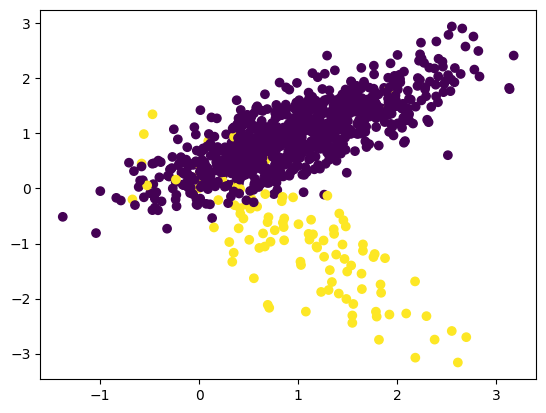

In [11]:
import matplotlib.pyplot as plt
plt.scatter(final_df["f1"],final_df["f2"],c=final_df["target"])

In [13]:
# pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/235.6 kB 1.3 MB/s eta 0:00:01
   ----- ---------------------------------- 30.7/235.6 kB 1.3 MB/s eta 0:00:01
   ----- ---------------------------------- 30.7/235.6 kB 1.3 MB/s eta 0:00:01
   --------------- ----------------------- 92.2/235.6 kB 525.1 kB/s eta 0:00:01
   --------------- ----------------------- 92.2/235.6 kB 525.1 kB/s eta 0:00:01
   --------------- ----------------------- 92.2/235.6 kB 525.1 kB/s eta 0:00:01
   ------------------ ------------------- 112.6/235.6 kB 364.4 kB/s eta 0:00:01
   ------------------ ------------------- 112.6/235.6 kB 364.4 kB/s eta 0:00

In [14]:
from imblearn.over_sampling import SMOTE 

In [22]:
oversample=SMOTE()
oversample.fit_resample(final_df[["f1","f2"]],final_df["target"])
x,y = oversample.fit_resample(final_df[["f1","f2"]],final_df["target"]) 

In [23]:
x,y

(            f1        f2
 0     1.536830 -1.398694
 1     1.551108  1.810329
 2     1.293619  1.010946
 3     1.119889  1.632518
 4     1.042356  1.121529
 ...        ...       ...
 1783  0.515171 -0.224654
 1784 -0.610443 -0.092190
 1785  0.442494 -0.434137
 1786  0.843247 -0.627455
 1787  2.193427 -2.311217
 
 [1788 rows x 2 columns],
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 1783    1
 1784    1
 1785    1
 1786    1
 1787    1
 Name: target, Length: 1788, dtype: int32)

In [24]:
x.shape

(1788, 2)

In [25]:
y.shape

(1788,)

In [26]:
y==0

0       False
1        True
2        True
3        True
4        True
        ...  
1783    False
1784    False
1785    False
1786    False
1787    False
Name: target, Length: 1788, dtype: bool

In [27]:
y[y==0]

1      0
2      0
3      0
4      0
5      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: target, Length: 894, dtype: int32

In [29]:
len(y[y==0])

894

In [30]:
len(y[y==1])

894

In [31]:
df1=pd.DataFrame(x,columns=["f1","f2"])
df2=pd.DataFrame(y,columns=["target"])
oversample_df=pd.concat([df1,df2],axis=1)

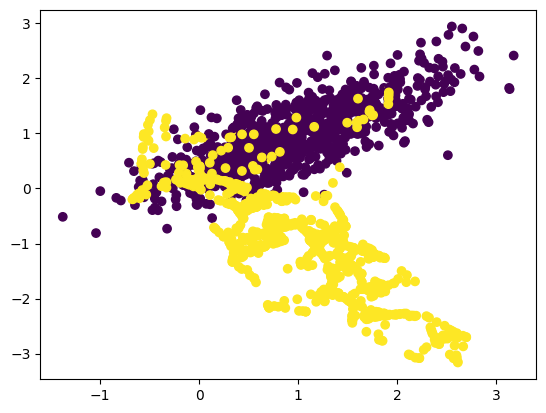

In [33]:
plt.scatter(oversample_df["f1"],oversample_df["f2"],c=oversample_df["target"])